# Nettoyage des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

app_train         = pd.read_csv("Scoringbanque/application_train.csv")
bureau_bal        = pd.read_csv("Scoringbanque/bureau_balance.csv")
bureau            = pd.read_csv("Scoringbanque/bureau.csv")
cred_card_bal     = pd.read_csv("Scoringbanque/credit_card_balance.csv")
home_cred_desc    = pd.read_csv("Scoringbanque/HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
installements_pay = pd.read_csv("Scoringbanque/installments_payments.csv")
pos_cash_bal      = pd.read_csv("Scoringbanque/POS_CASH_balance.csv")
prev_ap           = pd.read_csv("Scoringbanque/previous_application.csv")

## Vérification des données manquantes dans chaque tableau

Dans un premier temps, nous allons créer une fonction qui nous permet de vérifier les données manquantes par colonnes dans une dataframe. Ensuite, nous allons créer une fonction qui permet de vérifier le nombre de données manquantes par lignes dans une dataframe. De cette manière, nous allons supprimer les colonnes et les lignes comportants plus de 40% de données manquantes

In [2]:
# Création de la fonction affichant le pourcentage de valeurs manquantes par colonnes
def valeurs_manquantes(df,pourcentage) :
  """Cette fonction permet d'avoir 
  le pourcentage de données manquantes par colonnes."""
  #calculer le pourcentage de valeurs manquantes par colonnes
  total = df.isna().sum()
  ratio = total/len(df)*100
  miss = pd.DataFrame(zip(ratio,total.values),
                      columns=["Ratio_NaN","Total_NaN"],
                      index=df.columns)
  #n'afficher que les colonnes avec des valeurs manquantes
  return(miss[miss['Ratio_NaN']>pourcentage])

# Création de la fonction affichant le pourcentage de valeurs manquantes par lignes
def vm_lignes(df,pourcentage) :
  """Cette fonction permet d'avoir 
  le pourcentage de données manquantes par lignes."""
  #calculer le pourcentage de valeurs manquantes par lignes
  total = df.isnull().sum(axis=1)
  ratio = total/len(df.columns)*100
  miss = pd.DataFrame(zip(ratio,total.values),
                      columns=["Ratio_NaN","Total_NaN"])
  return(miss[miss['Ratio_NaN']>pourcentage])

# Valeurs des manquantes pour App_train
Nous commmençons d'abord par voir le nombre de valeurs manquantes dans la dataframe principales, app_train. 

In [3]:
#Pourcentage par colonnes 
valeurs_manquantes(app_train,0)

,Ratio_NaN,Total_NaN
AMT_ANNUITY,0.003902,12
AMT_GOODS_PRICE,0.090403,278
NAME_TYPE_SUITE,0.420148,1292
OWN_CAR_AGE,65.990810,202929
OCCUPATION_TYPE,31.345545,96391
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519


Nous voyons ici qu'il y a 67 colonnes avec des valeurs manquantes dans la dataframe app_train. Comme nous le voyons dans le tableau des résultats, certaines colonnes ont plus de 40% de données manquantes. Nous allons les enlever. 

In [4]:
#voir les colonnes où plus de 40% des données sont manquantes
df_40 = valeurs_manquantes(app_train,40)
#enlever ces colonnes d'app_train
cols_to_drop = df_40.T.columns
app_train2 = app_train.drop(columns=cols_to_drop)

Voyons maintenant les valeurs manquantes par lignes

In [5]:
#Pourcentage par ligne
vm_lignes(app_train2,0).max()

Ratio_NaN    16.438356
Total_NaN    12.000000
dtype: float64

Il y a très peu de valeurs manquantes par lignes. Nous n'avons donc pas besoin 

*   Élément de liste
*   Élément de liste

de supprimer ces lignes dans la dataframe app_train2. 

In [6]:
app_train2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
vm_lignes(app_train2,0).max()

Ratio_NaN    16.438356
Total_NaN    12.000000
dtype: float64

Suite à cela, nous verrons ici quelques traitements que nous ferons sur les valeurs catégorielles, pour supprimer les lignes ayant des valeurs aberrantes, des doublons.

In [10]:
def categ (df):
  cat_col = []
  cat_col_dic = {}
  cols = df.columns
  for col in cols:
    if df[col].dtype == "object":
      cat_col.append(col)
      for col in cat_col:
        cat_col_dic[col] = list(df[col].unique())
  return (cat_col_dic)

In [11]:
def categ_col (df):
  cat_col = []
  cols = df.columns
  for col in cols:
    if df[col].dtype == "object":
      cat_col.append(col)
  return (cat_col)

Comme nous le voyons plus haut, 2 colonnes : Code_gender et organization_type contiennent des données qui n'ont pas vraiment de sens comme XNA. Nous supprimerons les lignes qui contiennent ces données que nous ne pouvons pas forcément imputer. 

In [12]:
app_train2 = app_train2[app_train2['CODE_GENDER'] != 'XNA']
app_train2 = app_train2[app_train2['ORGANIZATION_TYPE'] != 'XNA']

Traitons maintenant les variables catégorielles d'app_train. Pour les colonnes avec des catégories binaires, nous allons utiliser un label encoder. Pour le reste, un one hot. 

In [13]:
# encoder les variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encoding (df):
  for col in categ_col(df):
    if len(df[col].unique())==2:
      df[col] = le.fit_transform(df[col])
  for col in categ_col (df):
    df = pd.get_dummies(df, columns=categ_col(df))
    return(df)

In [14]:
df = encoding(app_train2)

In [15]:
def fill_nan (df):  
  X = df.values 
  # To calculate most frequent use imputer class
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer = imputer.fit(X) 
  X = imputer.transform(X)
  df[df.columns] = X
  return (df)

In [16]:
app_train2 = fill_nan(app_train2)

In [17]:
import gc
del (app_train)
gc.collect()

0

### Bureau

In [18]:
#Pourcentage par colonnes 
valeurs_manquantes(bureau,0)

,Ratio_NaN,Total_NaN
DAYS_CREDIT_ENDDATE,6.149573,105553
DAYS_ENDDATE_FACT,36.916958,633653
AMT_CREDIT_MAX_OVERDUE,65.513264,1124488
AMT_CREDIT_SUM,0.000757,13
AMT_CREDIT_SUM_DEBT,15.011932,257669
AMT_CREDIT_SUM_LIMIT,34.477415,591780
AMT_ANNUITY,71.473490,1226791


Pour cette table, nous voyons des colonnes avec plein de NaN. Le premier est AMT_CREDIT_MAX_OVERDUE. Il s'agit de l'argent non remboursée maximale par la personne. AMT_ANNUITY est la rente perçue par l'individu. Si celles-ci ne sont  pas indiquée, on peut juste les imputer par rapport aux valeurs les plus fréquentes. 


In [19]:
bureau = encoding(bureau)

In [20]:
bureau2 = fill_nan(bureau)

### Bureau balance


In [21]:
#Pourcentage par colonnes 
valeurs_manquantes(bureau_bal,0)

,Ratio_NaN,Total_NaN


Il n'ya aucune donnée manquante dans bureau balance. Nous allons essayer de merger ensemble les données de bureau et de bureau balance. 

In [22]:
bureau_bal

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [23]:
bureau_bal = bureau_bal.groupby("SK_ID_BUREAU").mean()

In [24]:
bureau_fin = pd.merge(bureau2, bureau_bal, on="SK_ID_BUREAU")

In [25]:
bureau_fin = bureau_fin.groupby(["SK_ID_CURR" ]).mean()

In [26]:
len(bureau_fin)

134542

In [27]:
df = pd.merge(df, bureau_fin, on='SK_ID_CURR', how='left')

In [28]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.875000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,456248,0,0,0,0,1,0,153000.0,331920.0,16096.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252129,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252130,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.125000
252131,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.000000


In [29]:
df = fill_nan(df)

### prev_ap

In [31]:
#Valeurs manquantes par colonnes
valeurs_manquantes(prev_ap,0)

,Ratio_NaN,Total_NaN
AMT_ANNUITY,22.286665,372235
AMT_CREDIT,0.000060,1
AMT_DOWN_PAYMENT,53.636480,895844
AMT_GOODS_PRICE,23.081773,385515
RATE_DOWN_PAYMENT,53.636480,895844
RATE_INTEREST_PRIMARY,99.643698,1664263
RATE_INTEREST_PRIVILEGED,99.643698,1664263
NAME_TYPE_SUITE,49.119754,820405
CNT_PAYMENT,22.286366,372230
PRODUCT_COMBINATION,0.020716,346


In [32]:
#voir les colonnes où plus de 40% des données sont manquantes
df_40 = valeurs_manquantes(prev_ap,40)
#enlever ces colonnes d'app_train
cols_to_drop = df_40.T.columns
prev_ap2 = prev_ap.drop(columns=cols_to_drop)

In [33]:
#Pourcentage par ligne
vm_lignes(prev_ap2,0).max()

Ratio_NaN    15.384615
Total_NaN     4.000000
dtype: float64

In [34]:
prev_ap2 = encoding(prev_ap2)

In [35]:
prev_ap2

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,17145.0,15,1,1,-73,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,607500.0,11,1,1,-164,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,112500.0,11,1,1,-301,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,450000.0,7,1,1,-512,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,337500.0,9,1,1,-781,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,267295.5,12,1,1,-544,...,0,0,0,0,1,0,0,0,0,0
1670210,2357031,334635,6622.020,87750.0,64291.5,87750.0,15,1,1,-1694,...,0,0,0,0,1,0,0,0,0,0
1670211,2659632,249544,11520.855,105237.0,102523.5,105237.0,12,1,1,-1488,...,0,0,1,0,0,0,0,0,0,0
1670212,2785582,400317,18821.520,180000.0,191880.0,180000.0,9,1,1,-1185,...,1,0,0,0,0,0,0,0,0,0


In [36]:
prev_ap2 = prev_ap2.groupby(["SK_ID_CURR"]).mean()

In [37]:
prev_ap2

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1.369693e+06,3951.000000,24835.500,23787.00,24835.500,13.000000,1.0,1.0,-1740.000,23.000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
100002,1.038818e+06,9251.775000,179055.000,179055.00,179055.000,9.000000,1.0,1.0,-606.000,500.000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,0.0,1.0,0.0
100003,2.281150e+06,56553.990000,435436.500,484191.00,435436.500,14.666667,1.0,1.0,-1305.000,533.000,...,0.333333,0.00,0.333333,0.0,0.333333,0.0,0.00,0.0,0.0,0.0
100004,1.564014e+06,5357.250000,24282.000,20106.00,24282.000,5.000000,1.0,1.0,-815.000,30.000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,1.0,0.0,0.0
100005,2.176837e+06,4813.200000,22308.750,20076.75,44617.500,10.500000,1.0,1.0,-536.000,18.000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,2.248017e+06,6605.910000,40455.000,40455.00,40455.000,17.000000,1.0,1.0,-273.000,30.000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
456252,1.503599e+06,10074.465000,57595.500,56821.50,57595.500,10.000000,1.0,1.0,-2497.000,190.000,...,0.000000,0.00,0.000000,1.0,0.000000,0.0,0.00,0.0,0.0,0.0
456253,1.677221e+06,4770.405000,24162.750,20625.75,24162.750,11.500000,1.0,1.0,-2380.000,22.000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0


In [38]:
prev_ap2 = prev_ap2.drop(columns = "SK_ID_PREV")

In [39]:
prev_ap2

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000000,24835.500,23787.00,24835.500,13.000000,1.0,1.0,-1740.000,23.000,8.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
100002,9251.775000,179055.000,179055.00,179055.000,9.000000,1.0,1.0,-606.000,500.000,24.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,0.0,1.0,0.0
100003,56553.990000,435436.500,484191.00,435436.500,14.666667,1.0,1.0,-1305.000,533.000,10.00,...,0.333333,0.00,0.333333,0.0,0.333333,0.0,0.00,0.0,0.0,0.0
100004,5357.250000,24282.000,20106.00,24282.000,5.000000,1.0,1.0,-815.000,30.000,4.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,1.0,0.0,0.0
100005,4813.200000,22308.750,20076.75,44617.500,10.500000,1.0,1.0,-536.000,18.000,12.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,6605.910000,40455.000,40455.00,40455.000,17.000000,1.0,1.0,-273.000,30.000,8.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
456252,10074.465000,57595.500,56821.50,57595.500,10.000000,1.0,1.0,-2497.000,190.000,6.00,...,0.000000,0.00,0.000000,1.0,0.000000,0.0,0.00,0.0,0.0,0.0
456253,4770.405000,24162.750,20625.75,24162.750,11.500000,1.0,1.0,-2380.000,22.000,5.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0


In [40]:
prev_ap2 = fill_nan(prev_ap2)

In [41]:
prev_ap2

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000000,24835.500,23787.00,24835.500,13.000000,1.0,1.0,-1740.000,23.000,8.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
100002,9251.775000,179055.000,179055.00,179055.000,9.000000,1.0,1.0,-606.000,500.000,24.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,0.0,1.0,0.0
100003,56553.990000,435436.500,484191.00,435436.500,14.666667,1.0,1.0,-1305.000,533.000,10.00,...,0.333333,0.00,0.333333,0.0,0.333333,0.0,0.00,0.0,0.0,0.0
100004,5357.250000,24282.000,20106.00,24282.000,5.000000,1.0,1.0,-815.000,30.000,4.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.00,1.0,0.0,0.0
100005,4813.200000,22308.750,20076.75,44617.500,10.500000,1.0,1.0,-536.000,18.000,12.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.50,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,6605.910000,40455.000,40455.00,40455.000,17.000000,1.0,1.0,-273.000,30.000,8.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0
456252,10074.465000,57595.500,56821.50,57595.500,10.000000,1.0,1.0,-2497.000,190.000,6.00,...,0.000000,0.00,0.000000,1.0,0.000000,0.0,0.00,0.0,0.0,0.0
456253,4770.405000,24162.750,20625.75,24162.750,11.500000,1.0,1.0,-2380.000,22.000,5.00,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.00,0.0,0.0,0.0


In [42]:
df2 = pd.merge(df, prev_ap2, on='SK_ID_CURR', how='left')

### cred_card_bal


In [45]:
#Pourcentage par colonnes 
valeurs_manquantes(cred_card_bal,0)

,Ratio_NaN,Total_NaN
AMT_DRAWINGS_ATM_CURRENT,19.524872,749816
AMT_DRAWINGS_OTHER_CURRENT,19.524872,749816
AMT_DRAWINGS_POS_CURRENT,19.524872,749816
AMT_INST_MIN_REGULARITY,7.948208,305236
AMT_PAYMENT_CURRENT,19.998063,767988
CNT_DRAWINGS_ATM_CURRENT,19.524872,749816
CNT_DRAWINGS_OTHER_CURRENT,19.524872,749816
CNT_DRAWINGS_POS_CURRENT,19.524872,749816
CNT_INSTALMENT_MATURE_CUM,7.948208,305236


In [46]:
#Pourcentage par ligne
vm_lignes(cred_card_bal,0)

,Ratio_NaN,Total_NaN
45,30.434783,7
47,30.434783,7
49,30.434783,7
52,30.434783,7
60,30.434783,7
...,...,...
3840277,4.347826,1
3840303,30.434783,7
3840306,30.434783,7
3840307,30.434783,7


Il n'y a pas tant de données manquantes que ça si on prend en compte que le maximum est de 40% par ligne et 20% par colonne. On peut éventuellement amputer certaines valeurs étant donné que ce sont principalement des montants. Nous allons ainsi remplacer les valeurs numériques manquantes par la celles les plus fréquentes. 

In [47]:
cred_card_bal = encoding(cred_card_bal)

In [48]:
cred_card_bal = cred_card_bal.groupby("SK_ID_CURR").mean()

In [49]:
cred_card_bal

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,1489396.0,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100011,1843384.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.000000,3956.221849,4843.064189,...,25.767123,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100013,2038692.0,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.000000,1454.539551,7168.346250,...,18.719101,0.010417,0.010417,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100021,2594025.0,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.411765,0.0,0.588235,0.0,0.0,0.0,0.0
100023,1499902.0,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456244,2181926.0,-21.0,131834.730732,296341.463415,24475.609756,26842.388049,0.0,2363.015854,6514.200000,32720.544878,...,13.600000,0.000000,0.000000,0.878049,0.0,0.121951,0.0,0.0,0.0,0.0
456246,1079732.0,-5.5,13136.731875,135000.000000,0.000000,15199.256250,0.0,15199.256250,1439.150625,18778.275000,...,3.500000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
456247,1595171.0,-49.0,23216.396211,144000.000000,2136.315789,2149.506474,0.0,13.190684,1414.704789,4883.755263,...,26.494737,0.031579,0.021053,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [50]:
cred_card_bal2 = cred_card_bal.drop(columns = "SK_ID_PREV")

In [51]:
cred_card_bal2 = fill_nan(cred_card_bal2)

In [52]:
df = pd.merge(df, cred_card_bal2, on='SK_ID_CURR', how='left')

In [53]:
import gc
del (cred_card_bal)
gc.collect()

0

In [54]:
df=fill_nan(df)

### installements_pay


In [56]:
#Pourcentage par colonnes 
valeurs_manquantes(installements_pay,0)

,Ratio_NaN,Total_NaN
DAYS_ENTRY_PAYMENT,0.021352,2905
AMT_PAYMENT,0.021352,2905


Très peu de données manquantes aussi dans cette dataframe

In [57]:
installements_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [58]:
installements_pay = installements_pay.groupby(["SK_ID_CURR"]).mean()
installements_pay = installements_pay.drop(columns = "SK_ID_PREV")


In [59]:
installements_pay = fill_nan(installements_pay)

In [60]:
installements_pay

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,
100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
...,...,...,...,...,...,...
456251,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
456252,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
456253,1.000000,4.785714,-2372.928571,-2387.428571,4399.707857,4115.915357


In [61]:
df = pd.merge(df, installements_pay, on="SK_ID_CURR", how = "left")

In [62]:
import gc
del (installements_pay)
gc.collect()

0

In [63]:
len(df)

252133

In [64]:
df["SK_ID_CURR"] = df["SK_ID_CURR"].astype(int)

### pos_cash_bal


In [65]:
valeurs_manquantes(pos_cash_bal,0)

,Ratio_NaN,Total_NaN
CNT_INSTALMENT,0.260675,26071
CNT_INSTALMENT_FUTURE,0.260835,26087


Très peu de données manquantes aussi dans cette dataframe

In [66]:
#Pourcentage par ligne
vm_lignes(pos_cash_bal,0)

,Ratio_NaN,Total_NaN
709,25.0,2
759,25.0,2
1887,25.0,2
1899,25.0,2
1910,25.0,2
...,...,...
9998668,25.0,2
9998696,25.0,2
9999114,25.0,2
9999116,25.0,2


In [67]:
pos_cash_bal2 = encoding(pos_cash_bal)

In [68]:
pos_cash_bal2 = pos_cash_bal2.groupby(["SK_ID_CURR"]).mean()

In [69]:
pos_cash_bal2 = fill_nan(pos_cash_bal2)

In [70]:
len(pos_cash_bal2)

337252

In [71]:
pos_cash_bal2 = pos_cash_bal2.drop(columns = "SK_ID_PREV")

In [73]:
pos_cash_bal2.head(1)

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
SK_ID_CURR,,,,,,,,,,,,,,
100001,-72.555556,4.0,1.444444,0.777778,0.777778,0.777778,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0


In [74]:
df = pd.merge(df, pos_cash_bal2, on="SK_ID_CURR",how='left')

In [76]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved_y,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_y,NAME_CONTRACT_STATUS_XNA
0,100002,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,100003,0.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.928571,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0
2,100004,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.750000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0


In [77]:
fill_nan(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved_y,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_y,NAME_CONTRACT_STATUS_XNA
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.000000,0.928571,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0
2,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,...,0.000000,0.750000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0
3,100006.0,0.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,...,0.000000,0.857143,0.0,0.0,0.0,0.095238,0.0,0.047619,0.000000,0.0
4,100007.0,0.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,...,0.000000,0.939394,0.0,0.0,0.0,0.045455,0.0,0.000000,0.015152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,456248.0,0.0,0.0,0.0,0.0,1.0,0.0,153000.0,331920.0,16096.5,...,0.000000,0.953488,0.0,0.0,0.0,0.046512,0.0,0.000000,0.000000,0.0
252129,456251.0,0.0,0.0,1.0,0.0,0.0,0.0,157500.0,254700.0,27558.0,...,0.000000,0.777778,0.0,0.0,0.0,0.111111,0.0,0.000000,0.111111,0.0
252130,456253.0,0.0,0.0,0.0,0.0,1.0,0.0,153000.0,677664.0,29979.0,...,0.294118,0.882353,0.0,0.0,0.0,0.117647,0.0,0.000000,0.000000,0.0
252131,456254.0,1.0,0.0,0.0,0.0,1.0,0.0,171000.0,370107.0,20205.0,...,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [ ]:
df["SK_ID_CURR"] = df["SK_ID_CURR"].astype(int)

Maintenant, nous allons sauvegarder les dataframes dont nous auront besoin pour la visualisation et l'entraînement. 

In [79]:
df.to_csv('df.csv') 

In [80]:
app_train2.to_csv('app_train2.csv') 

# Entraînement et analyse descriptive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df= pd.read_csv("df.csv")
app_train2 = pd.read_csv("app_train2.csv")

In [2]:
y = df.TARGET
X = df.drop(['TARGET'], axis=1, inplace=True)



In [3]:
X = df.set_index('SK_ID_CURR')

In [4]:
X.drop("Unnamed: 0",inplace=True,axis=1)

In [5]:
X.drop("SK_ID_BUREAU",inplace=True,axis=1)

In [6]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [7]:
feature_name = X.columns.tolist()

## Sélection des features 

Dans le cadre de cette étude, nous allons sélectionner les features en vérifiant quelles sont ceux qui sont les plus utilisés par 6 modèles différents. 

## Filtres

### Correlation de pearson

In [8]:

def cor_selector(X, y):
    cor_list = []
    # calcul des corrélations pour chaque feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # nom des features
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # sélection des features
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

100 selected features


/home/yosh/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/yosh/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


### chi2

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


## Wrapper

### RFE sur regression logistique

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(max_iter=750, solver='sag'), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 259 features.
Fitting estimator with 249 features.
Fitting estimator with 239 features.
Fitting estimator with 229 features.
Fitting estimator with 219 features.
Fitting estimator with 209 features.
Fitting estimator with 199 features.
Fitting estimator with 189 features.
Fitting estimator with 179 features.
Fitting estimator with 169 features.
Fitting estimator with 159 features.
Fitting estimator with 149 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.


RFE(estimator=LogisticRegression(max_iter=750, solver='sag'),
    n_features_to_select=100, step=10, verbose=5)

In [11]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


## Embed

### Régression logistique

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=750, solver='sag')
embeded_lr_selector = SelectFromModel(logreg)
embeded_lr_selector.fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

63 selected features


### Random Forest

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
embeded_rf_selector = SelectFromModel(forest, threshold='1.25*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

114 selected features


### LGBM

In [14]:
from sklearn.feature_selection import SelectFromModel
import lightgbm
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=100,max_depth=5,
colsample_bytree=0.1, num_leaves=50)
embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

127 selected features


In [17]:
pd.set_option('display.max_rows', None)
# Visualisation des features sélectionnés par chaque modèle
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# Nombre de fois où le feature a été sélectionné
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# visualisation du top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,REGION_RATING_CLIENT_W_CITY,True,True,True,True,True,True,6
2,EXT_SOURCE_3,True,True,True,True,True,True,6
3,EXT_SOURCE_2,True,True,True,True,True,True,6
4,DEF_60_CNT_SOCIAL_CIRCLE,True,True,True,True,True,True,6
5,DEF_30_CNT_SOCIAL_CIRCLE,True,True,True,True,True,True,6
6,DAYS_EMPLOYED,True,True,True,True,True,True,6
7,CNT_INSTALMENT_FUTURE,True,True,True,True,True,True,6
8,CNT_DRAWINGS_POS_CURRENT,True,True,True,True,True,True,6
9,CNT_DRAWINGS_CURRENT,True,True,True,True,True,True,6
10,CNT_DRAWINGS_ATM_CURRENT,True,True,True,True,True,True,6


In [18]:
features = feature_selection_df[feature_selection_df["Total"]>2]

In [19]:
feature_list = features ["Feature"]

In [20]:
feature_list = list(feature_list)

In [21]:
X=X[feature_list]

In [22]:
X.shape

(252133, 116)

## Datavisualisation

In [162]:
def vizcategorie (datas, col, 
                  xlabel_angle=0, title=''):
  '''use this for ploting the count of categorical features'''
  valueplot = datas[col].value_counts() / len(datas)
  plt.figure(figsize = [12,5])
  sns.barplot(x = valueplot.index, y=valueplot.values)
  plt.xlabel('Catégories')
  plt.title(title)
  if xlabel_angle!=0: 
    plt.xticks(rotation=xlabel_angle)
  plt.show()

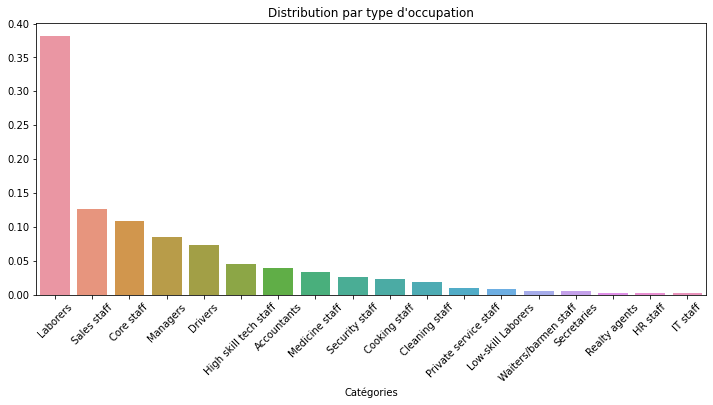

In [163]:
vizcategorie(datas=app_train2, col='OCCUPATION_TYPE', xlabel_angle=45, title='Distribution par type d\'occupation')

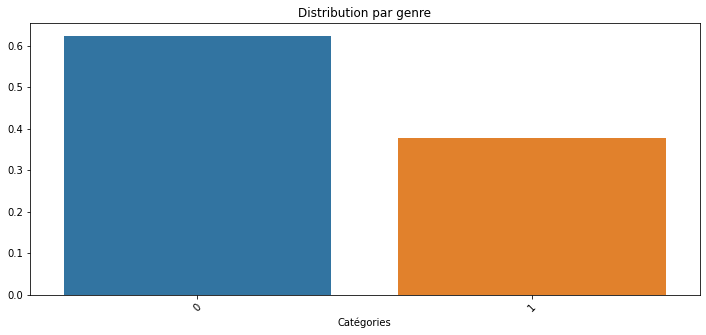

In [164]:
vizcategorie(datas=app_train2, col='CODE_GENDER', xlabel_angle=45, title='Distribution par genre')

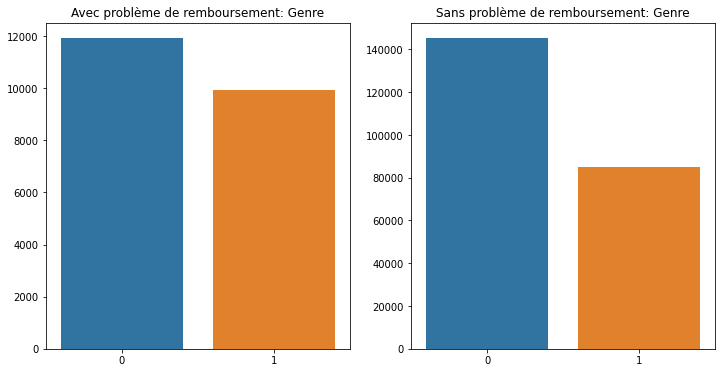

In [26]:
def plot_categorical_bylabel(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
    plt.figure(figsize = size)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Avec problème de remboursement: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Sans problème de remboursement: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical_bylabel(app_train2, 'CODE_GENDER', title='Genre')

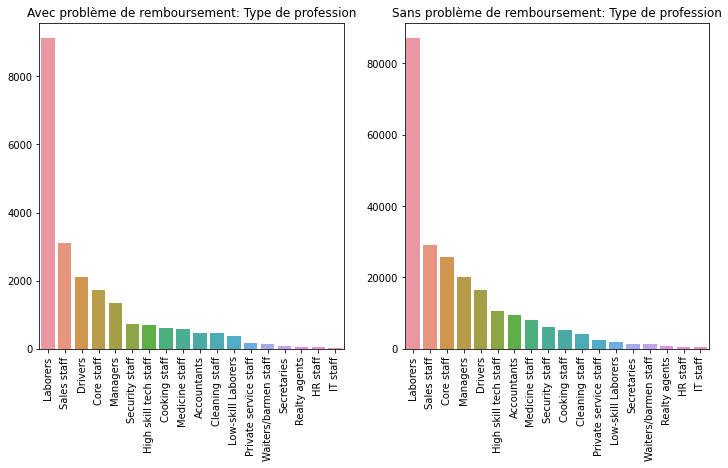

In [27]:
plot_categorical_bylabel(app_train2, 'OCCUPATION_TYPE', title='Type de profession', xlabel_angle=90)

## Test and train separation

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.shape

(176493, 116)

In [30]:
y_train.shape

(176493,)

## Equilibrage des données avec SMOTE

In [31]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

176493 176493 75640 75640


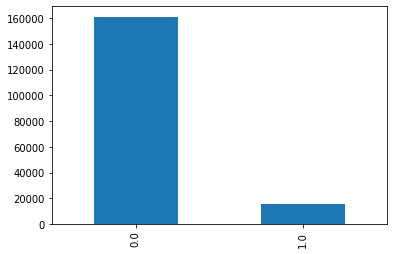

In [32]:
ax = (y_train.value_counts()).plot.bar()

In [33]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_b, y_train_b = smote.fit_resample(X_train, y_train)



In [34]:
X_train_b.shape

(322282, 116)

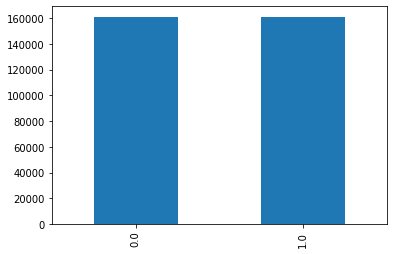

In [35]:
ax = (y_train_b.value_counts()).plot.bar()

## Test des modèles 

### Régression logistique

In [36]:
X_norm_train, X_norm_test = MinMaxScaler().fit_transform(X_train_b),MinMaxScaler().fit_transform(X_test)

In [189]:
logreg.fit(X_norm_train,y_train_b)
y_pred=logreg.predict(X_norm_test)

In [190]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6692226335272343
Precision: 0.16241121835731195
Recall: 0.6877988585531389


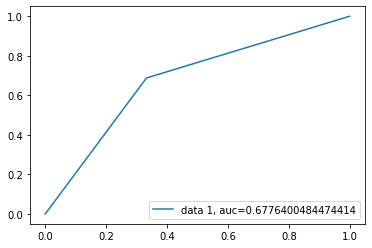

In [191]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


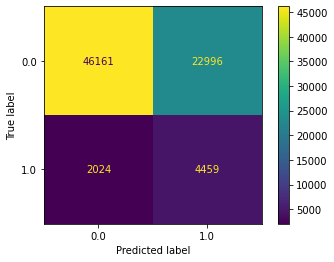

In [192]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_norm_test, y_test)

### LightGBM

In [41]:
lgbc.fit(X_train_b,y_train_b)
y_pred=lgbc.predict(X_test)

In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9142252776308831
Precision: 0.3684210526315789
Recall: 0.0010797470306956657


/home/yosh/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


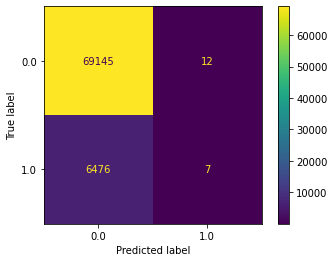

In [50]:
#########################
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgbc, X_test, y_test)

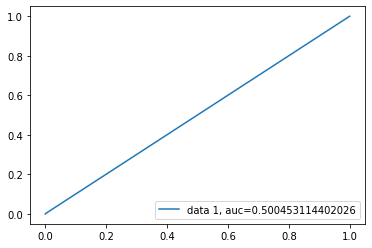

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Création d'une fonction bancaire 

In [193]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(y_test, y_pred)
x.ravel()
#vrai_pos, faux_pos, faux_neg, vrai_neg

array([46161, 22996,  2024,  4459])

In [222]:
def custom_loss_func (y_test, y_pred):
  vp, fp, fn, vn = confusion_matrix(y_test,y_pred).ravel()
  score = vp + fp*10+ fn*30 + vn/ (vp+fp+fn+vn)
  return score

In [223]:
print("coût bancaire:",custom_loss_func(y_test,y_pred))

coût bancaire: 331129.0583818086


### Random Forest

In [224]:
forest.fit(X_train_b,y_train_b)
y_pred=forest.predict(X_test)

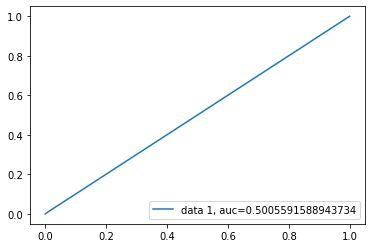

In [225]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("coût bancaire:",custom_loss_func(y_test,y_pred))

Accuracy: 0.9143971443680592
Precision: 0.8333333333333334
Recall: 0.001542495758136665
coût bancaire: 198619.00013220517


/home/yosh/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


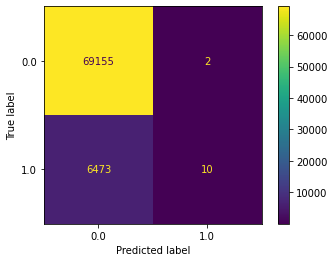

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest, X_test, y_test)

### Conclusion des tests

Nous pouvons voir que c'est la régression logistique qui permet d'avoir de meilleurs scores. Nous allons donc essayer d'améliorer le classement sur ce modèle

### Création d'un score à partir de la fonction bancaire

In [226]:
from sklearn.metrics import make_scorer


In [227]:
custom_score = make_scorer(custom_loss_func, greater_is_better=True)
from sklearn.model_selection import GridSearchCV

In [228]:
parameters = { 
    'solver'  :  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

In [229]:
import time
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(logreg,
                    param_grid=parameters,
                    scoring=custom_score,
                    n_jobs=6,
                    cv=5,
                    verbose=10)

start = time.time()
grid.fit( X_norm_train, y_train_b)
time.time() - start

Fitting 5 folds for each of 25 candidates, totalling 125 fits


1712.6172578334808

In [231]:
grid.best_params_

{'C': 0.01, 'solver': 'lbfgs'}

In [232]:
parameters = { 
    'solver'  :  ['lbfgs'],
    'C' : [0.01],
    'penalty' : ["l2", "none"],
    'max_iter' : [750, 1000, 1250, 1500]
}
grid = GridSearchCV(logreg,
                    param_grid=parameters,
                    scoring=custom_score,
                    n_jobs=6,
                    cv=5,
                    verbose=10)

start = time.time()
grid.fit( X_norm_train, y_train_b)
time.time() - start

Fitting 5 folds for each of 8 candidates, totalling 40 fits


368.45808482170105

In [233]:
grid.best_params_

{'C': 0.01, 'max_iter': 750, 'penalty': 'l2', 'solver': 'lbfgs'}

In [234]:
log_opt = LogisticRegression(max_iter=750, solver='lbfgs',C=0.01, penalty='l2')

In [235]:
log_opt.fit(X_norm_train,y_train_b)
y_pred=log_opt.predict(X_norm_test)

In [236]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6790983606557377
Precision: 0.16582763543466827
Recall: 0.680857627641524


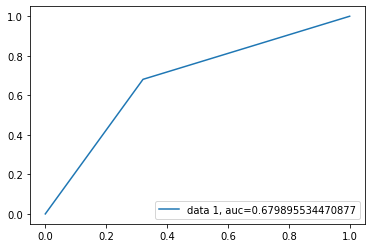

In [237]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


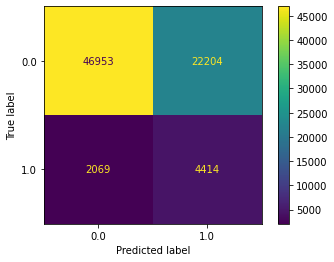

In [239]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_opt, X_norm_test, y_test)

## Interprétabilité globale et individuelle

In [244]:
import shap
log_opt.fit(X_norm_train, y_train_b)
explainer = shap.Explainer(log_opt,X_norm_train)
shap_values = explainer(X_norm_test)


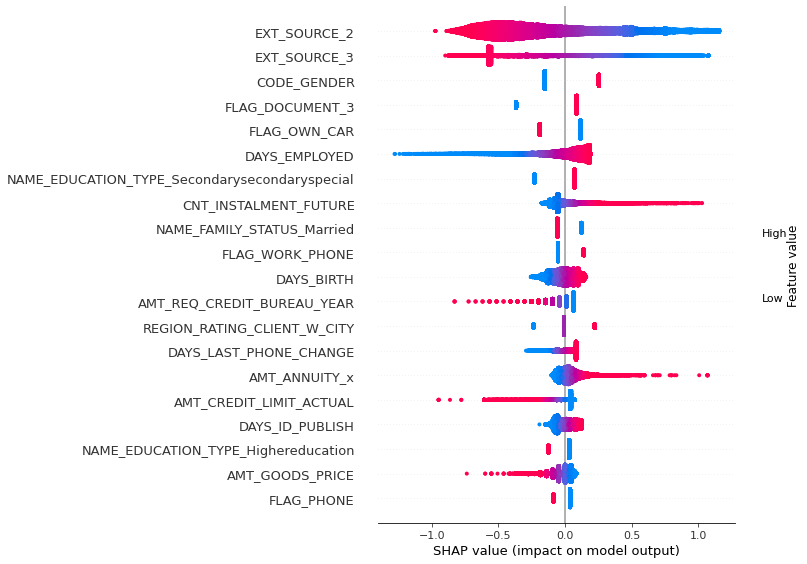

In [245]:
fig = shap.summary_plot(shap_values, feature_names=X.columns,show=False)

In [246]:
initjs()
ind = 1
shap.plots.force(shap_values[ind],feature_names=X.columns)

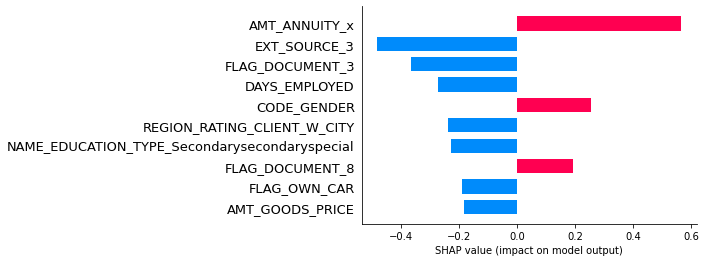

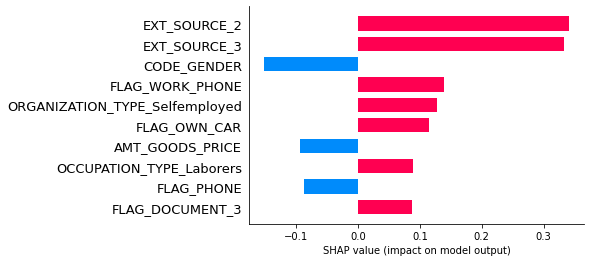

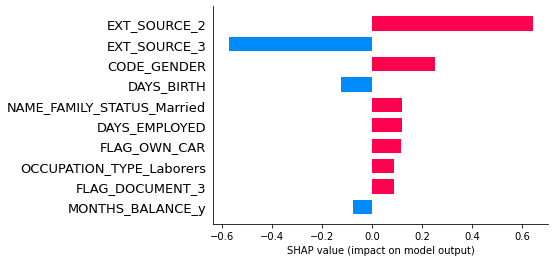

In [247]:
for i in range(3):
    shap.bar_plot(shap_values[i].values, feature_names=X.columns, max_display = 10)

## Sauvegarde des modèles

In [243]:
filename = 'shap_values.pkl'
joblib.dump(shap_values, filename)

['shap_values.pkl']

In [242]:
import joblib
# save the model to disk
filename = 'finalized_model.pkl'
joblib.dump(log_opt, filename)

 


['finalized_model.pkl']